In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple Notation for Mathmatics in Python
## Linear Algebra
### Vector

In [3]:
# represent vector and use them as our examples
u = np.array([2, 5])
v = np.array([3, 1])

In [4]:
# norm: the measure of the length of one vector
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

In [5]:
# addition
u + v

array([5, 6])

In [6]:
# multiplication by a scalar
1.5 * u

array([3. , 7.5])

In [7]:
# calculate the normalized vector (a vector with unit length)
v / LA.norm(v)

array([0.9486833 , 0.31622777])

In [8]:
# dot product
np.dot(u, v)

11

In [9]:
# calculating the angle between vectors (by using the low of cosine)
def vector_angle(u, v):
    # return radian
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


In [10]:
# projecting 
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized
proj

array([0.75862069, 1.89655172])

### Metrics

In [11]:
# represent metrics
A = np.array([
    [10,20,30],
    [40,50,60]
])
B = np.array([[1,2,3], [4,5,6]])

In [12]:
# shape
A.shape, A.size

((2, 3), 6)

In [13]:
# Element Indexing
A[1, 2] # 2nd row, 3rd, column
A[1, :] # 2nd, row vector (as a 1D array)
# see python indexing methods

array([40, 50, 60])

In [14]:
# construct special matrics
np.diag([4, 5, 6]) # construct a diagonal matrix
np.eye(3) # create a 3 * 3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
# Addition
A + B

array([[11, 22, 33],
       [44, 55, 66]])

In [16]:
# Scalar Multiplication
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

In [17]:
# matrics multiplication
# way 1: by using dot product
D = np.array([
    [2, 3, 5, 7],
    [11, 13, 17, 19],
    [23, 29, 31, 37]
])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [18]:
# way 2: by @ operater
A @ D 

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [19]:
# matrix transpose
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

In [20]:
(A @ D).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [21]:
(D.T @ A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [22]:
# Matrix Inverse
F = np.array([
        [1, 1.5],
        [0, 1]
    ])
F_inv = LA.inv(F)
F_inv

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

In [23]:
# Determinant
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])
LA.det(M)

27.0

In [24]:
# Eigenvalue & Eigenvectors, trace... can be put on later

# Linear Model

## Solve Linear Model by Normal Equation

In [25]:
# linear-looking data 
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [26]:
# perfrom the normal equation calculation
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [27]:
# best parameter
theta_best

array([[4.1691785],
       [2.6927491]])

In [28]:
# predict with the parameter
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1691785 ],
       [9.55467669]])

In [29]:
# by sklearn and by scipy method is ignored here for simplicity

## Gradient Descent
How to deal with a very larget dataset? (large amount of features or too many training instances to fit in memory)
### Batch Gradient Descent
This is not going to be very fast: it uses every data to calculate derivatives over parameters and move on that direction.

In [30]:
# try to prove we can find the same parameter
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization: normal distribution of 2 numbers around 1 with std = 1 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[4.1691785],
       [2.6927491]])

### Stochastic Gradient Descent

In [32]:
# application, details are on the notes: a fast random way of calculating gradient
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [33]:
theta

array([[4.24146544],
       [2.68965762]])

In [34]:
# sklearn do have a SGD model installed
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [35]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19056445]), array([2.74290884]))

# Polynomial Regression

In [36]:
# generate some nonlinear data, based on a quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [37]:
# use sklearn method to transform (generate new feature)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [38]:
X[0] # the old feature

array([0.21091465])

In [39]:
X_poly[0] # with the new transformed feature

array([0.21091465, 0.04448499])

In [40]:
# train this in the linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [41]:
lin_reg.intercept_, lin_reg.coef_ # the second term gives the coefficient of 1+ powers term

(array([1.97571348]), array([[1.03898021, 0.51533503]]))

## Learning Curves

In [46]:
# line of code to generate learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2) # split train-validation set
    train_errors, val_errors = [], [] # initialize the error lists
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # train the model for ont time with the training set of m size
        y_train_predict = model.predict(X_train[:m]) # predict on the train set
        y_val_predict = model.predict(X_val) # predict on the validation set
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.grid()
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("MSE", fontsize=14) # the testing citeria

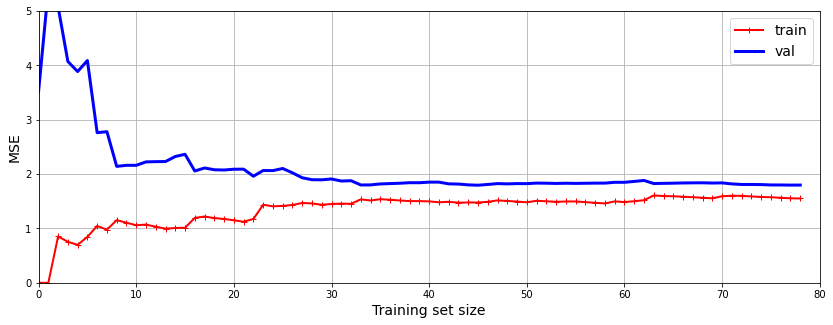

In [47]:
# the learning curve of the pure linear model (should be underfitting)
lin_reg = LinearRegression()

plt.figure(figsize=(14, 5)) # change figure size
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 5]) # locate for the range
plt.show()

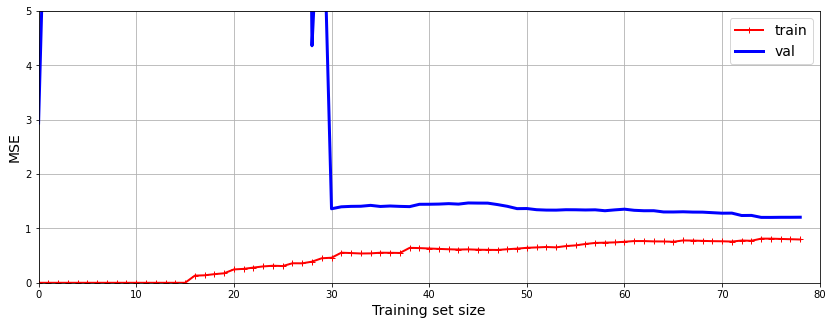

In [48]:
# the learning curve of the 10th degree polynomial model (should be overfitting)
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plt.figure(figsize=(14, 5)) # change figure size
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5]) # locate for the range
plt.show()

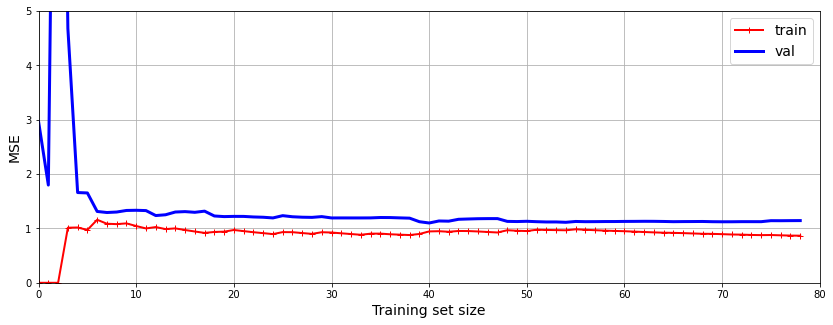

In [49]:
# the learning curve of the 2nd degree polynomial model (should be just right)
from sklearn.pipeline import Pipeline

quadratic_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plt.figure(figsize=(14, 5)) # change figure size
plot_learning_curves(quadratic_regression, X, y)
plt.axis([0, 80, 0, 5]) # locate for the range
plt.show()

# Regularized Linear Models
## Ridge Regression

In [50]:
# perform the ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.91103725]])

In [51]:
# add ridge regularization onto the SGD model
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.89410598])

## Lasso Regression

In [52]:
# perform the lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.85754225])

In [ ]:
# similar things just with penalty = 'l1'

## Elastic Net

In [53]:
# perform the Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86013873])